In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
class HiddenLayer:
    def __init__(self,n_in_units,n_out_units):
        "first layer structure"
        self.n_in_units=n_in_units
        self.n_out_units=n_out_units
        
        self.next_units=[]
        self.potential=[]
        self.delta=[]
        self.out=[]
        np.random.seed(0)
        self.weights = np.random.rand(self.n_in_units, n_out_units) # later need transpose 
        
    def sigmoid(self,a):
        return 1/(1+np.exp(-a))
    
    
    def forward_pass(self,input_units): #compute output
        "computer hiddenlayer units' activation value"
        self.potential=input_units.dot(self.weights)
        self.next_units=self.sigmoid(self.potential)
        self.out=np.insert(self.next_units,0,1,axis=1)
        
    def back_prop(self,pre_unit,next_delta,next_weights,stepsize):
        "compute delta: using deriviate of sigmoid function"
        "gradient descent: #average gradient"
        self.delta= self.out * (1-self.out)*(next_delta.dot(next_weights.T))
        self.weights = self.weights -(stepsize * pre_unit.T.dot(self.delta[:,1:]))/pre_unit.shape[0]

In [31]:
class OutLayer(HiddenLayer):
    def _init_(self,n_in_units,n_out_units):
        "output layer constructure"
        HiddenLayer._init_(self,n_in_units,n_out_units)
        self.out=0
        self.predict=[]
        
    def forward_pass(self, input_units):
        self.out=input_units.dot(self.weights)

        
    def backward_prop(self,pred_unit,true_unit,stepsize,pre_units):
        self.delta= 2*(pred_unit- true_unit)
        self.weights = self.weights - stepsize * pre_units.T.dot(self.delta) / pre_units.shape[0]
        

        
    def mse(self,true_unit):
        "computing float value of output, not after threshold"
        return np.mean(np.square(self.out - true_unit))
    
    def predict_unit(self):
        "use for feed backward"
        return np.where(self.out > 0.5, 1, 0)
    
    def predict_unit_continous(self):
        "use for feed backward"
        self.predict=np.where(self.out >0,1,self.out)
        self.predict=np.where(self.predict<0,-1,self.predict)
        return self.predict
   

XOR TASK:

In [8]:
X = np.array([[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]]) #as in the front as bias
Y = np.array([[1],[0], [0], [1]])

In [11]:
epochs=4000
stepsize=0.1
error=[]
n_in_units=2
n_out_units=1
hiddenlayer=HiddenLayer(X.shape[1],n_in_units)
outlayer=OutLayer(n_in_units+1,n_out_units)   
#extra one dim is bias term

In [12]:
for epoch in range(epochs):
    hiddenlayer.forward_pass(X)
    outlayer.forward_pass(hiddenlayer.out)
  
    
    pred_unit=outlayer.predict_unit()
    
    out=outlayer.out

    outlayer.backward_prop(pred_unit,Y,stepsize,hiddenlayer.out)
    #outlayer.backward_prop(pred_unit,Y,stepsize,hiddenlayer.next_units)
    
    #hiddenlayer.back_prop(X,hiddenlayer.next_units,outlayer.weights,stepsize)
    hiddenlayer.back_prop(X,outlayer.delta,outlayer.weights,stepsize)
    error.append(outlayer.mse(Y))

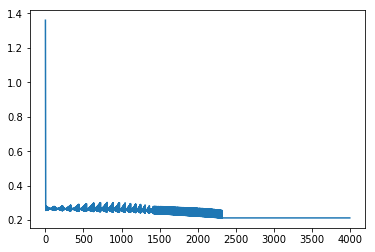

In [13]:
plt.plot(error)


Bounes Task 1: Continous value

In [32]:
n=10
y=np.zeros(n)
data=np.random.uniform(low=-1, high=1, size=(n, 2))
data=np.insert(data,0,1,axis=1)
y[data[:, 1] * data[:, 2]==0]=0
y[data[:, 1] * data[:, 2]>0]=1
y[data[:, 1] * data[:, 2]<0]=-1
y=y.reshape(n,1)


In [90]:
epochs=80000
stepsize=0.015
error=[]
n_in_units=3
n_out_units=1
hiddenlayer=HiddenLayer(data.shape[1],n_in_units)
outlayer=OutLayer(n_in_units+1,n_out_units)

In [91]:
for epoch in range(epochs):
    hiddenlayer.forward_pass(data)
    outlayer.forward_pass(hiddenlayer.out)
  
    pred_unit=outlayer.predict_unit_continous()
    out=outlayer.out
    outlayer.backward_prop(pred_unit,y,stepsize,hiddenlayer.out)
    hiddenlayer.back_prop(data,outlayer.delta,outlayer.weights,stepsize)
    error.append(outlayer.mse(y))

In [101]:
print("final predict:",out.T,"\ntrue result:",y.T)

final predict: [[-0.03904699 -0.01451859 -0.00058122  0.0002173   0.01898803  0.01611626
  -0.0703888   0.05680999  0.08459035 -0.02222008]] 
true result: [[-1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]]


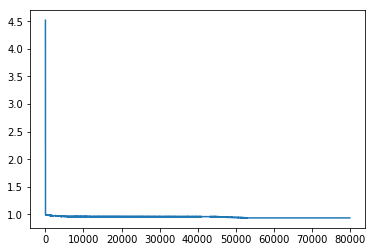

In [92]:
plt.plot(error)